# Classificação em Python

In [1]:
#
#Bibliotecas básicas
#
import pandas as pd
import numpy as np
np.random.seed(42)
import sqlite3 as sql


#
#Bibliotecas visualização
#
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(12, 8))
import seaborn as sns
#import plotly.express as px
#import plotly.offline as pyo
#import plotly.graph_objects as go
#pyo.init_notebook_mode()
#import scipy.stats as st
#import missingno as msno

#
#Biblioteca algorítimos ML
#
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn import ensemble, tree
#import statsmodels.api as sm
#import statsmodels.formula.api as smf

#
#Biblioteca algorítimos ML
#
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve

#from imblearn.over_sampling import SMOTE



from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity="all"



In [2]:
#Tabela com clusters
con = sql.connect("../../dados/sql/base_completa.db")
df=pd.read_sql("select * from tabela_classificação",con)
con.close()

In [4]:
correlação=df.corr()
correlação

,followers_count,ORGAO_PARTICIPANTE,ORGAO_TOTAL,ORGAO_GESTOR,PERC_PRESENCA,TOTAL_PROPOSTAS,GASTO_GABINETE,cluster
followers_count,1.000000,-0.019301,-0.022890,-0.022271,-0.068410,0.036629,-0.109320,-0.027886
ORGAO_PARTICIPANTE,-0.019301,1.000000,0.958030,0.439777,0.338110,0.306902,-0.069316,-0.110263
ORGAO_TOTAL,-0.022890,0.958030,1.000000,0.678779,0.341813,0.306467,-0.069689,-0.057011
ORGAO_GESTOR,-0.022271,0.439777,0.678779,1.000000,0.204752,0.173958,-0.040766,0.103844
PERC_PRESENCA,-0.068410,0.338110,0.341813,0.204752,1.000000,0.243437,0.360119,-0.055938
TOTAL_PROPOSTAS,0.036629,0.306902,0.306467,0.173958,0.243437,1.000000,0.032154,-0.159972
GASTO_GABINETE,-0.109320,-0.069316,-0.069689,-0.040766,0.360119,0.032154,1.000000,0.264896
cluster,-0.027886,-0.110263,-0.057011,0.103844,-0.055938,-0.159972,0.264896,1.000000


In [5]:
df.columns
variaveis=list(df.columns)
variaveis.remove("CPF")
target=["cluster"]
variaveis
target

Index(['CPF', 'followers_count', 'ORGAO_PARTICIPANTE', 'ORGAO_TOTAL',
       'ORGAO_GESTOR', 'PERC_PRESENCA', 'TOTAL_PROPOSTAS', 'GASTO_GABINETE',
       'cluster'],
      dtype='object')

['followers_count',
 'ORGAO_PARTICIPANTE',
 'ORGAO_TOTAL',
 'ORGAO_GESTOR',
 'PERC_PRESENCA',
 'TOTAL_PROPOSTAS',
 'GASTO_GABINETE',
 'cluster']

['cluster']

In [6]:
preditores=list(set(variaveis)-set(target))
variaveis=target+preditores
correlação=df[variaveis].corr()
correlação

,cluster,ORGAO_GESTOR,ORGAO_PARTICIPANTE,ORGAO_TOTAL,GASTO_GABINETE,PERC_PRESENCA,TOTAL_PROPOSTAS,followers_count
cluster,1.000000,0.103844,-0.110263,-0.057011,0.264896,-0.055938,-0.159972,-0.027886
ORGAO_GESTOR,0.103844,1.000000,0.439777,0.678779,-0.040766,0.204752,0.173958,-0.022271
ORGAO_PARTICIPANTE,-0.110263,0.439777,1.000000,0.958030,-0.069316,0.338110,0.306902,-0.019301
ORGAO_TOTAL,-0.057011,0.678779,0.958030,1.000000,-0.069689,0.341813,0.306467,-0.022890
GASTO_GABINETE,0.264896,-0.040766,-0.069316,-0.069689,1.000000,0.360119,0.032154,-0.109320
PERC_PRESENCA,-0.055938,0.204752,0.338110,0.341813,0.360119,1.000000,0.243437,-0.068410
TOTAL_PROPOSTAS,-0.159972,0.173958,0.306902,0.306467,0.032154,0.243437,1.000000,0.036629
followers_count,-0.027886,-0.022271,-0.019301,-0.022890,-0.109320,-0.068410,0.036629,1.000000


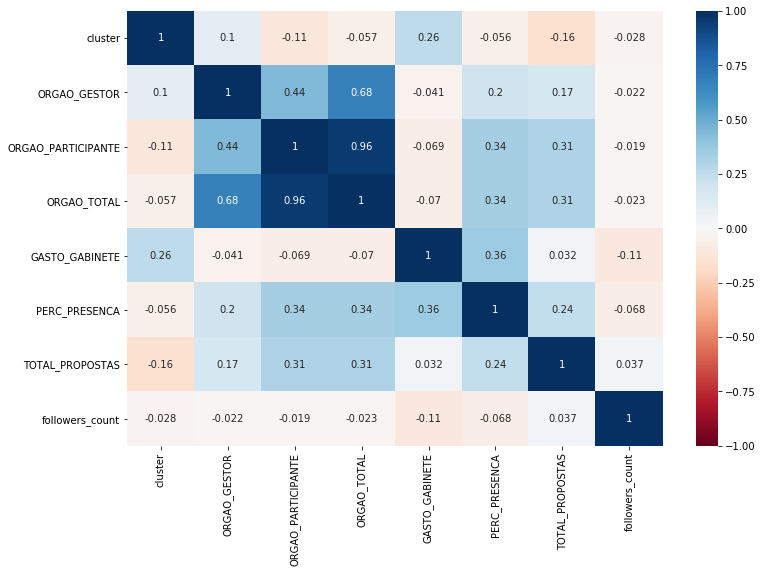

In [7]:
plt.rc('figure', figsize=(12, 8))
sns.heatmap(correlação,annot=True, vmin=-1, vmax=1, cmap="RdBu")

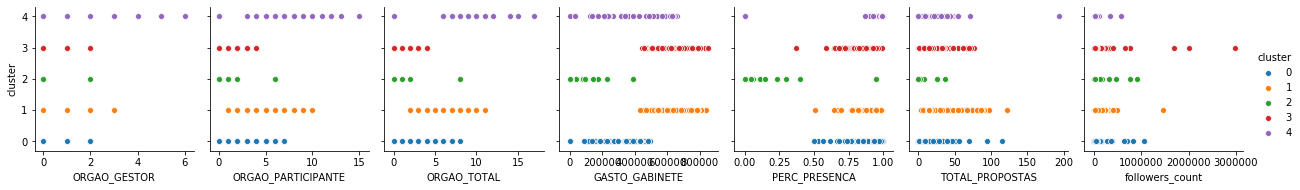

In [8]:
sns.pairplot(df, y_vars=target, x_vars=preditores, hue=target[0])

In [9]:
#preditores=variaveis_numericas
#preditores.remove(target[0])
preditores
target

['ORGAO_GESTOR',
 'ORGAO_PARTICIPANTE',
 'ORGAO_TOTAL',
 'GASTO_GABINETE',
 'PERC_PRESENCA',
 'TOTAL_PROPOSTAS',
 'followers_count']

['cluster']

## Escala dos preditores

In [10]:
def verifica_escala(preditores,df):
    x=df[preditores].values
    plt.plot(x.min(axis=0),"o", label="min")
    plt.plot(x.max(axis=0),"^", label="max")
    plt.legend(loc="best")
    plt.xlabel("Feature index")
    plt.ylabel("Feature magnitude")
    plt.yscale("log")
    print(df[preditores].max().round(3))

ORGAO_GESTOR                6.00
ORGAO_PARTICIPANTE         15.00
ORGAO_TOTAL                17.00
GASTO_GABINETE         853397.72
PERC_PRESENCA               1.00
TOTAL_PROPOSTAS           194.00
followers_count       2979333.00
dtype: float64


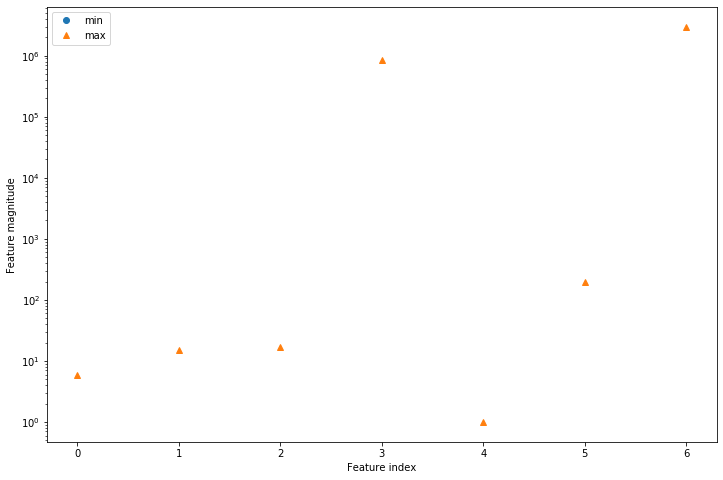

In [11]:
verifica_escala(preditores, df)

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df[preditores].values)
x=scaler.transform(df[preditores].values)
df_scaled=pd.DataFrame(x,columns=preditores)
df_scaled[target]=df[target]
df_scaled.head()
df_original=df.copy()
df=df_scaled.copy()

MinMaxScaler()

,ORGAO_GESTOR,ORGAO_PARTICIPANTE,ORGAO_TOTAL,GASTO_GABINETE,PERC_PRESENCA,TOTAL_PROPOSTAS,followers_count,cluster
0,0.000000,0.066667,0.058824,0.658987,0.968,0.020619,0.000824,3
1,0.000000,0.000000,0.000000,0.089757,0.012,0.005155,0.000000,2
2,0.500000,0.533333,0.647059,0.744199,0.972,0.061856,0.001535,4
3,0.000000,0.133333,0.117647,0.517717,0.924,0.149485,0.000000,0
4,0.166667,0.266667,0.294118,0.490974,0.964,0.175258,0.000905,0


## treino e teste


In [14]:
df_treino, df_teste= train_test_split(df, test_size=0.3, random_state=42, stratify=df[target])

In [15]:
df_treino.shape
df_teste.shape

(369, 8)

(159, 8)

## Não balanceado

In [16]:
# Não balanceado
X_treino=df_treino[preditores].values
y_treino=(df_treino[target].values).ravel()

X_treino.shape
y_treino.shape
X_teste=df_teste[preditores].values
y_teste=np.array(df_teste[target]).ravel()
y_treino[1:10]

(369, 7)

(369,)

array([3, 3, 3, 0, 3, 3, 4, 3, 1])

In [19]:
def classificação(modelo,target,preditores,treino,teste):
    x_treino=treino[preditores].values
    y_treino=treino[target].values
    y_treino=y_treino.ravel()
    
    x_teste=teste[preditores].values
    y_teste=teste[target].values
    
    modelo.fit(x_treino, y_treino)
    y_treino_pred=modelo.predict(x_treino)
    y_teste_pred=modelo.predict(x_teste)
    print(modelo)
    plot_confusion_matrix(modelo, x_teste,y_teste, cmap='Blues')
    print("Acurácia no treino: {:.3f}".format(modelo.score(x_treino, y_treino)))
    print("Acuracia no teste: {:.3f}".format(modelo.score(x_teste, y_teste)))
    print("Precisão no teste: {:.3f}".format(precision_score(y_teste, y_teste_pred,average="weighted")))
    print("Recall no teste: {:.3f}".format(recall_score(y_teste, y_teste_pred,average="weighted")))
    print("F1 no teste: {:.3f}".format(f1_score(y_teste, y_teste_pred,average="weighted")))
    #plot_roc_curve(modelo, x_teste, y_teste)
    mod={}
    mod["modelo"]=modelo
    mod["acuracia_teste"]=modelo.score(x_teste, y_teste)
    mod["acuracia_treino"]=modelo.score(x_treino, y_treino)
    return mod

In [18]:
lista_modelos=[]

## KNN - verificando o valor de K ideal

## Verificando o número e a acurácia

KNeighborsClassifier(n_neighbors=1)

KNeighborsClassifier(n_neighbors=2)

KNeighborsClassifier(n_neighbors=3)

KNeighborsClassifier(n_neighbors=4)

KNeighborsClassifier()

KNeighborsClassifier(n_neighbors=6)

KNeighborsClassifier(n_neighbors=7)

KNeighborsClassifier(n_neighbors=8)

KNeighborsClassifier(n_neighbors=9)

KNeighborsClassifier(n_neighbors=10)

KNeighborsClassifier(n_neighbors=11)

KNeighborsClassifier(n_neighbors=12)

KNeighborsClassifier(n_neighbors=13)

KNeighborsClassifier(n_neighbors=14)

KNeighborsClassifier(n_neighbors=15)

KNeighborsClassifier(n_neighbors=16)

KNeighborsClassifier(n_neighbors=17)

KNeighborsClassifier(n_neighbors=18)

KNeighborsClassifier(n_neighbors=19)

KNeighborsClassifier(n_neighbors=20)

KNeighborsClassifier(n_neighbors=21)

KNeighborsClassifier(n_neighbors=22)

KNeighborsClassifier(n_neighbors=23)

KNeighborsClassifier(n_neighbors=24)

KNeighborsClassifier(n_neighbors=25)

KNeighborsClassifier(n_neighbors=26)

KNeighborsClassifier(n_neighbors=27)

KNeighborsClassifier(n_neighbors=28)

KNeighborsClassifier(n_neighbors=29)

KNeighborsClassifier(n_neighbors=30)

KNeighborsClassifier(n_neighbors=31)

KNeighborsClassifier(n_neighbors=32)

KNeighborsClassifier(n_neighbors=33)

KNeighborsClassifier(n_neighbors=34)

KNeighborsClassifier(n_neighbors=35)

KNeighborsClassifier(n_neighbors=36)

KNeighborsClassifier(n_neighbors=37)

KNeighborsClassifier(n_neighbors=38)

KNeighborsClassifier(n_neighbors=39)

KNeighborsClassifier(n_neighbors=40)

KNeighborsClassifier(n_neighbors=41)

KNeighborsClassifier(n_neighbors=42)

KNeighborsClassifier(n_neighbors=43)

KNeighborsClassifier(n_neighbors=44)

KNeighborsClassifier(n_neighbors=45)

KNeighborsClassifier(n_neighbors=46)

KNeighborsClassifier(n_neighbors=47)

KNeighborsClassifier(n_neighbors=48)

KNeighborsClassifier(n_neighbors=49)

,Parametro,acuracia_treino,acuracia_teste
12,12,0.934959,0.918239
9,9,0.934959,0.918239
13,13,0.921409,0.911950
15,15,0.910569,0.911950
14,14,0.924119,0.911950


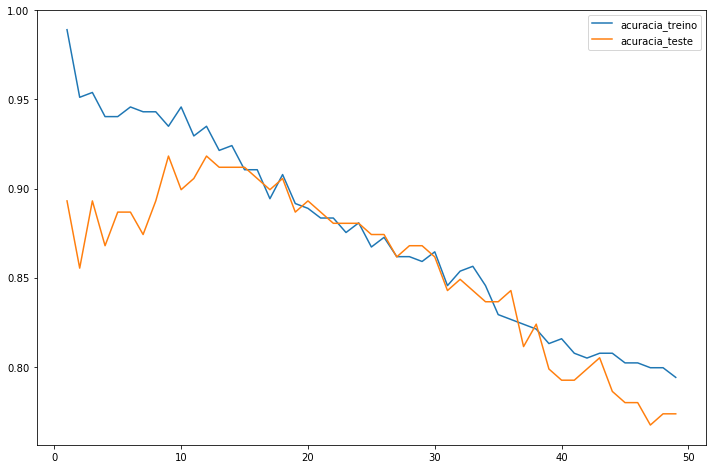

In [20]:
x_treino=df_treino[preditores].values
y_treino=df_treino[target].values
y_treino=y_treino.ravel()
x_teste=df_teste[preditores].values
y_teste=df_teste[target].values

valores=range(1,50)

ac_treino=[]
ac_teste=[]
    
for val in valores:
    modelo= KNeighborsClassifier(n_neighbors=val)
    modelo.fit(x_treino, y_treino)
    #y_treino_pred=modelo.predict(x_treino)
    #y_teste_pred=modelo.predict(x_teste)
    ac_treino.append(modelo.score(x_treino, y_treino))
    ac_teste.append(modelo.score(x_teste, y_teste))
    
df_acuracia=pd.DataFrame({"Parametro":valores,"acuracia_treino":ac_treino,"acuracia_teste":ac_teste }, index=valores) 
df_acuracia[["acuracia_treino","acuracia_teste"]].plot()
df_acuracia.sort_values("acuracia_teste", inplace=True, ascending=False)
df_acuracia.head()

KNeighborsClassifier(n_neighbors=12)
Acurácia no treino: 0.935
Acuracia no teste: 0.918
Precisão no teste: 0.920
Recall no teste: 0.918
F1 no teste: 0.917


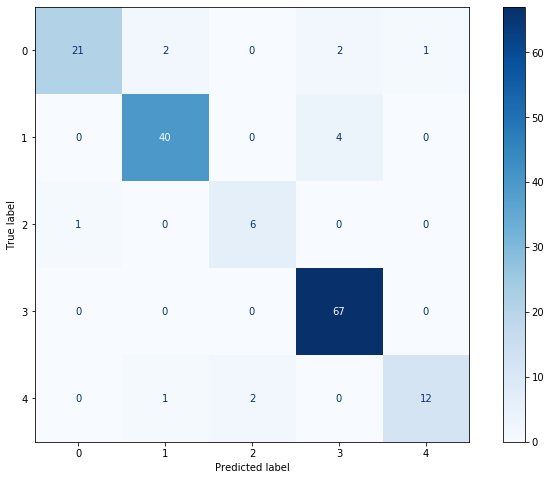

In [21]:
modelo = KNeighborsClassifier(n_neighbors=12)

result=classificação(modelo,target, preditores, df_treino, df_teste)
modelo=result["modelo"]
lista_modelos.append(result)

## Árvore de Decisão 

## Verificando a profundidade da árvore e a acurácia

DecisionTreeClassifier(max_depth=2, random_state=42)

DecisionTreeClassifier(max_depth=3, random_state=42)

DecisionTreeClassifier(max_depth=4, random_state=42)

DecisionTreeClassifier(max_depth=5, random_state=42)

DecisionTreeClassifier(max_depth=6, random_state=42)

DecisionTreeClassifier(max_depth=7, random_state=42)

DecisionTreeClassifier(max_depth=8, random_state=42)

DecisionTreeClassifier(max_depth=9, random_state=42)

DecisionTreeClassifier(max_depth=10, random_state=42)

DecisionTreeClassifier(max_depth=11, random_state=42)

DecisionTreeClassifier(max_depth=12, random_state=42)

DecisionTreeClassifier(max_depth=13, random_state=42)

DecisionTreeClassifier(max_depth=14, random_state=42)

DecisionTreeClassifier(max_depth=15, random_state=42)

DecisionTreeClassifier(max_depth=16, random_state=42)

DecisionTreeClassifier(max_depth=17, random_state=42)

DecisionTreeClassifier(max_depth=18, random_state=42)

DecisionTreeClassifier(max_depth=19, random_state=42)

DecisionTreeClassifier(max_depth=20, random_state=42)

DecisionTreeClassifier(max_depth=21, random_state=42)

DecisionTreeClassifier(max_depth=22, random_state=42)

DecisionTreeClassifier(max_depth=23, random_state=42)

DecisionTreeClassifier(max_depth=24, random_state=42)

DecisionTreeClassifier(max_depth=25, random_state=42)

DecisionTreeClassifier(max_depth=26, random_state=42)

DecisionTreeClassifier(max_depth=27, random_state=42)

DecisionTreeClassifier(max_depth=28, random_state=42)

DecisionTreeClassifier(max_depth=29, random_state=42)

DecisionTreeClassifier(max_depth=30, random_state=42)

DecisionTreeClassifier(max_depth=31, random_state=42)

DecisionTreeClassifier(max_depth=32, random_state=42)

DecisionTreeClassifier(max_depth=33, random_state=42)

DecisionTreeClassifier(max_depth=34, random_state=42)

DecisionTreeClassifier(max_depth=35, random_state=42)

DecisionTreeClassifier(max_depth=36, random_state=42)

DecisionTreeClassifier(max_depth=37, random_state=42)

DecisionTreeClassifier(max_depth=38, random_state=42)

DecisionTreeClassifier(max_depth=39, random_state=42)

DecisionTreeClassifier(max_depth=40, random_state=42)

DecisionTreeClassifier(max_depth=41, random_state=42)

DecisionTreeClassifier(max_depth=42, random_state=42)

DecisionTreeClassifier(max_depth=43, random_state=42)

DecisionTreeClassifier(max_depth=44, random_state=42)

DecisionTreeClassifier(max_depth=45, random_state=42)

DecisionTreeClassifier(max_depth=46, random_state=42)

DecisionTreeClassifier(max_depth=47, random_state=42)

DecisionTreeClassifier(max_depth=48, random_state=42)

DecisionTreeClassifier(max_depth=49, random_state=42)

,Parametro,acuracia_treino,acuracia_teste
26,26,0.989160,0.905660
38,38,0.989160,0.905660
29,29,0.989160,0.905660
30,30,0.989160,0.905660
31,31,0.989160,0.905660
32,32,0.989160,0.905660
33,33,0.989160,0.905660
34,34,0.989160,0.905660
35,35,0.989160,0.905660
36,36,0.989160,0.905660


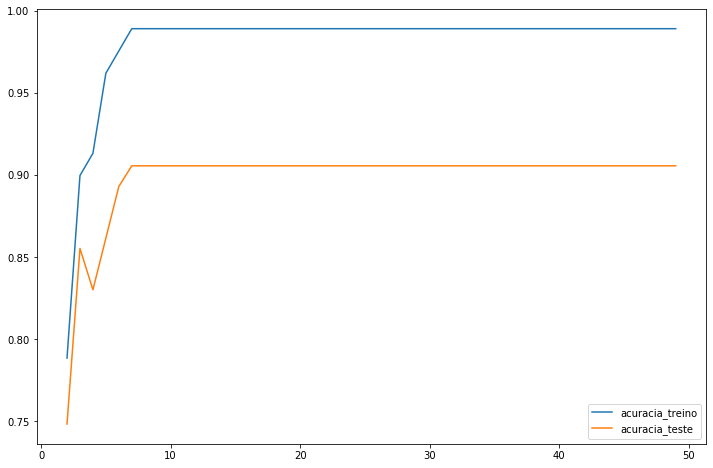

In [22]:
x_treino=df_treino[preditores].values
y_treino=df_treino[target].values
y_treino=y_treino.ravel()
x_teste=df_teste[preditores].values
y_teste=df_teste[target].values

valores=range(2,50)

ac_treino=[]
ac_teste=[]
    
for val in valores:
    modelo= DecisionTreeClassifier(max_depth=val, random_state=42)
    modelo.fit(x_treino, y_treino)
    #y_treino_pred=modelo.predict(x_treino)
    #y_teste_pred=modelo.predict(x_teste)
    ac_treino.append(modelo.score(x_treino, y_treino))
    ac_teste.append(modelo.score(x_teste, y_teste))
    
df_acuracia=pd.DataFrame({"Parametro":valores,"acuracia_treino":ac_treino,"acuracia_teste":ac_teste }, index=valores) 
df_acuracia[["acuracia_treino","acuracia_teste"]].plot()
df_acuracia.sort_values("acuracia_teste", inplace=True, ascending=False)
df_acuracia.head(50)

DecisionTreeClassifier(max_depth=6)
Acurácia no treino: 0.976
Acuracia no teste: 0.893
Precisão no teste: 0.902
Recall no teste: 0.893
F1 no teste: 0.894


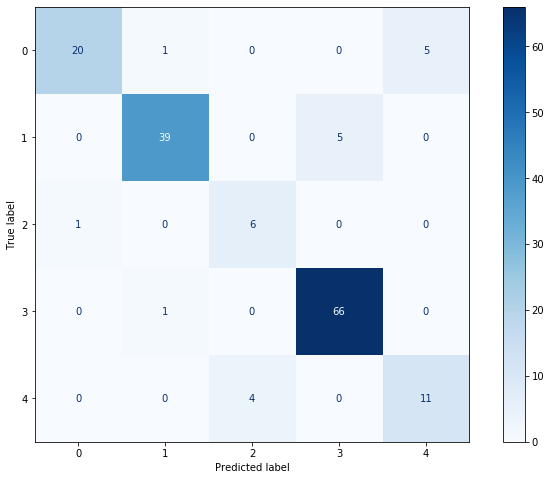

In [23]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
modelo = DecisionTreeClassifier(max_depth=6)

result=classificação(modelo,target, preditores, df_treino, df_teste)
modelo=result["modelo"]
lista_modelos.append(result)

### Visualizando a árvore

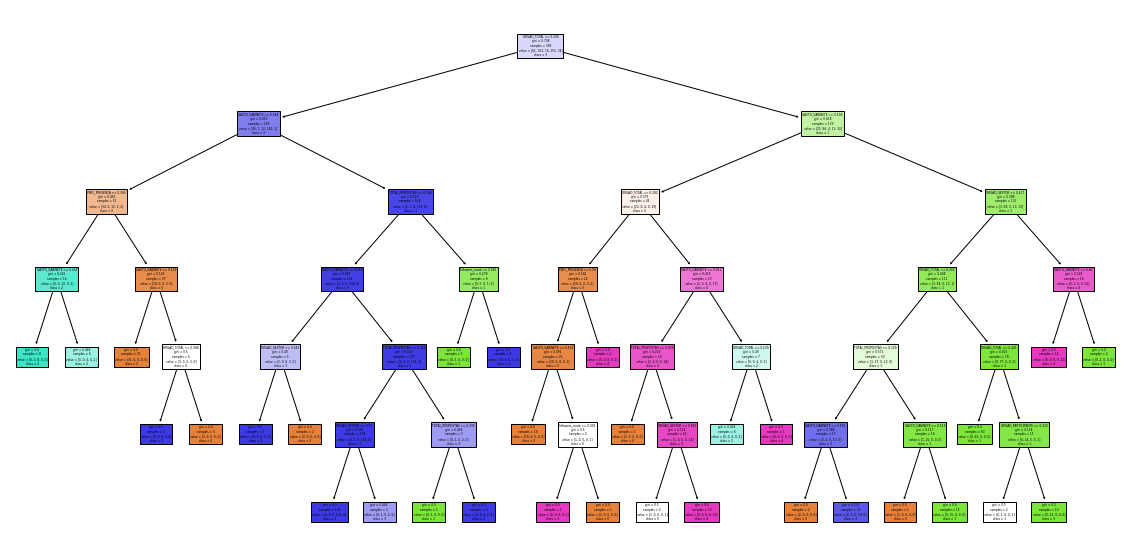

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plot_tree(modelo, feature_names=preditores, filled=True,
          class_names=["0","1","2","3","4"]);

In [ ]:
modelo.feature_importances_
preditores
importancia=pd.Series(modelo.feature_importances_, index=preditores)
importancia=importancia.sort_values(ascending=True)
importancia.plot(kind="barh")

## SVM

## Verificando o valor de C

SVC(C=1)

SVC(C=2)

SVC(C=3)

SVC(C=4)

SVC(C=5)

SVC(C=6)

SVC(C=7)

SVC(C=8)

SVC(C=9)

SVC(C=10)

SVC(C=11)

SVC(C=12)

SVC(C=13)

SVC(C=14)

SVC(C=15)

SVC(C=16)

SVC(C=17)

SVC(C=18)

SVC(C=19)

SVC(C=20)

SVC(C=21)

SVC(C=22)

SVC(C=23)

SVC(C=24)

SVC(C=25)

SVC(C=26)

SVC(C=27)

SVC(C=28)

SVC(C=29)

SVC(C=30)

SVC(C=31)

SVC(C=32)

SVC(C=33)

SVC(C=34)

SVC(C=35)

SVC(C=36)

SVC(C=37)

SVC(C=38)

SVC(C=39)

SVC(C=40)

SVC(C=41)

SVC(C=42)

SVC(C=43)

SVC(C=44)

SVC(C=45)

SVC(C=46)

SVC(C=47)

SVC(C=48)

SVC(C=49)

,Parametro,acuracia_treino,acuracia_teste
1,1,0.96206,0.949686
6,6,0.96477,0.949686
2,2,0.96748,0.949686
24,24,0.97561,0.943396
45,45,0.97832,0.943396


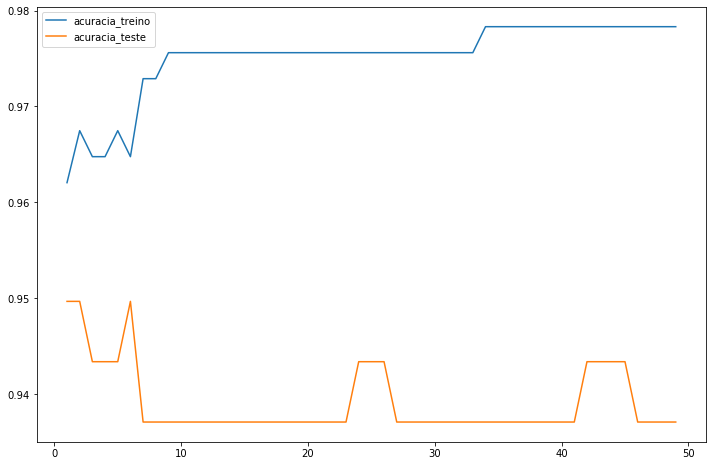

In [26]:
x_treino=df_treino[preditores].values
y_treino=df_treino[target].values
y_treino=y_treino.ravel()
x_teste=df_teste[preditores].values
y_teste=df_teste[target].values

valores=range(1,50)

ac_treino=[]
ac_teste=[]
    
for val in valores:
    modelo=  SVC(C=val)
    modelo.fit(x_treino, y_treino)
    #y_treino_pred=modelo.predict(x_treino)
    #y_teste_pred=modelo.predict(x_teste)
    ac_treino.append(modelo.score(x_treino, y_treino))
    ac_teste.append(modelo.score(x_teste, y_teste))
    
df_acuracia=pd.DataFrame({"Parametro":valores,"acuracia_treino":ac_treino,"acuracia_teste":ac_teste }, index=valores) 
df_acuracia[["acuracia_treino","acuracia_teste"]].plot()
df_acuracia.sort_values("acuracia_teste", inplace=True, ascending=False)
df_acuracia.head()

## Verificando o valor de gamma

SVC(C=1, gamma=0.1)

SVC(C=1, gamma=0.30000000000000004)

SVC(C=1, gamma=0.5000000000000001)

SVC(C=1, gamma=0.7000000000000001)

SVC(C=1, gamma=0.9000000000000001)

SVC(C=1, gamma=1.1000000000000003)

SVC(C=1, gamma=1.3000000000000003)

SVC(C=1, gamma=1.5000000000000004)

SVC(C=1, gamma=1.7000000000000004)

SVC(C=1, gamma=1.9000000000000004)

SVC(C=1, gamma=2.1000000000000005)

SVC(C=1, gamma=2.3000000000000007)

SVC(C=1, gamma=2.5000000000000004)

SVC(C=1, gamma=2.7000000000000006)

SVC(C=1, gamma=2.900000000000001)

SVC(C=1, gamma=3.1000000000000005)

SVC(C=1, gamma=3.3000000000000007)

SVC(C=1, gamma=3.500000000000001)

SVC(C=1, gamma=3.7000000000000006)

SVC(C=1, gamma=3.900000000000001)

SVC(C=1, gamma=4.1000000000000005)

SVC(C=1, gamma=4.300000000000001)

SVC(C=1, gamma=4.500000000000001)

SVC(C=1, gamma=4.7)

SVC(C=1, gamma=4.9)

,Parametro,acuracia_treino,acuracia_teste
1.7,1.7,0.96748,0.955975
2.5,2.5,0.97019,0.949686
1.5,1.5,0.96748,0.949686
2.7,2.7,0.97019,0.949686
2.3,2.3,0.97290,0.949686


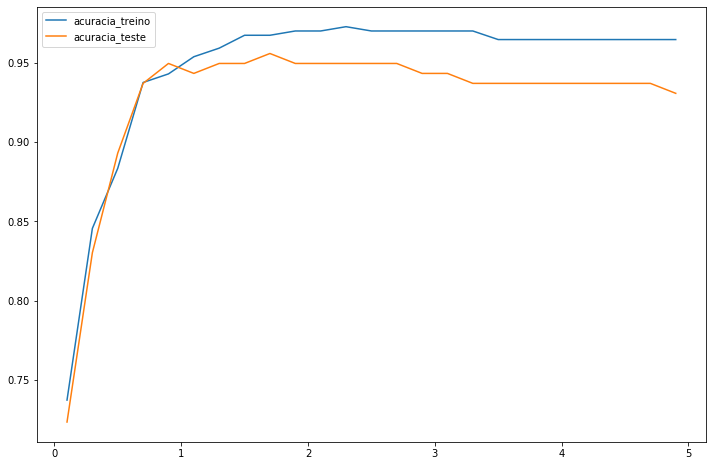

In [27]:
x_treino=df_treino[preditores].values
y_treino=df_treino[target].values
y_treino=y_treino.ravel()
x_teste=df_teste[preditores].values
y_teste=df_teste[target].values

valores=list(np.arange(0.1,5,0.2))

ac_treino=[]
ac_teste=[]
    
for val in valores:
    modelo=  SVC(C=1, gamma=val)
    modelo.fit(x_treino, y_treino)
    #y_treino_pred=modelo.predict(x_treino)
    #y_teste_pred=modelo.predict(x_teste)
    ac_treino.append(modelo.score(x_treino, y_treino))
    ac_teste.append(modelo.score(x_teste, y_teste))
    
df_acuracia=pd.DataFrame({"Parametro":valores,"acuracia_treino":ac_treino,"acuracia_teste":ac_teste }, index=valores) 
df_acuracia[["acuracia_treino","acuracia_teste"]].plot()
df_acuracia.sort_values("acuracia_teste", inplace=True, ascending=False)
df_acuracia.head()

In [ ]:

modelo = SVC(C=1, gamma=1.6)


result=classificação(modelo,target, preditores, df_treino, df_teste)
modelo=result["modelo"]
lista_modelos.append(result)


## Random Forest

### verificando o valor de estimadores

In [28]:
from sklearn.ensemble import RandomForestClassifier

RandomForestClassifier(max_depth=7, n_estimators=1, random_state=42)

RandomForestClassifier(max_depth=7, n_estimators=2, random_state=42)

RandomForestClassifier(max_depth=7, n_estimators=3, random_state=42)

RandomForestClassifier(max_depth=7, n_estimators=4, random_state=42)

RandomForestClassifier(max_depth=7, n_estimators=5, random_state=42)

RandomForestClassifier(max_depth=7, n_estimators=6, random_state=42)

RandomForestClassifier(max_depth=7, n_estimators=7, random_state=42)

RandomForestClassifier(max_depth=7, n_estimators=8, random_state=42)

RandomForestClassifier(max_depth=7, n_estimators=9, random_state=42)

RandomForestClassifier(max_depth=7, n_estimators=10, random_state=42)

RandomForestClassifier(max_depth=7, n_estimators=11, random_state=42)

RandomForestClassifier(max_depth=7, n_estimators=12, random_state=42)

RandomForestClassifier(max_depth=7, n_estimators=13, random_state=42)

RandomForestClassifier(max_depth=7, n_estimators=14, random_state=42)

RandomForestClassifier(max_depth=7, n_estimators=15, random_state=42)

RandomForestClassifier(max_depth=7, n_estimators=16, random_state=42)

RandomForestClassifier(max_depth=7, n_estimators=17, random_state=42)

RandomForestClassifier(max_depth=7, n_estimators=18, random_state=42)

RandomForestClassifier(max_depth=7, n_estimators=19, random_state=42)

RandomForestClassifier(max_depth=7, n_estimators=20, random_state=42)

RandomForestClassifier(max_depth=7, n_estimators=21, random_state=42)

RandomForestClassifier(max_depth=7, n_estimators=22, random_state=42)

RandomForestClassifier(max_depth=7, n_estimators=23, random_state=42)

RandomForestClassifier(max_depth=7, n_estimators=24, random_state=42)

RandomForestClassifier(max_depth=7, n_estimators=25, random_state=42)

RandomForestClassifier(max_depth=7, n_estimators=26, random_state=42)

RandomForestClassifier(max_depth=7, n_estimators=27, random_state=42)

RandomForestClassifier(max_depth=7, n_estimators=28, random_state=42)

RandomForestClassifier(max_depth=7, n_estimators=29, random_state=42)

RandomForestClassifier(max_depth=7, n_estimators=30, random_state=42)

RandomForestClassifier(max_depth=7, n_estimators=31, random_state=42)

RandomForestClassifier(max_depth=7, n_estimators=32, random_state=42)

RandomForestClassifier(max_depth=7, n_estimators=33, random_state=42)

RandomForestClassifier(max_depth=7, n_estimators=34, random_state=42)

RandomForestClassifier(max_depth=7, n_estimators=35, random_state=42)

RandomForestClassifier(max_depth=7, n_estimators=36, random_state=42)

RandomForestClassifier(max_depth=7, n_estimators=37, random_state=42)

RandomForestClassifier(max_depth=7, n_estimators=38, random_state=42)

RandomForestClassifier(max_depth=7, n_estimators=39, random_state=42)

RandomForestClassifier(max_depth=7, n_estimators=40, random_state=42)

RandomForestClassifier(max_depth=7, n_estimators=41, random_state=42)

RandomForestClassifier(max_depth=7, n_estimators=42, random_state=42)

RandomForestClassifier(max_depth=7, n_estimators=43, random_state=42)

RandomForestClassifier(max_depth=7, n_estimators=44, random_state=42)

RandomForestClassifier(max_depth=7, n_estimators=45, random_state=42)

RandomForestClassifier(max_depth=7, n_estimators=46, random_state=42)

RandomForestClassifier(max_depth=7, n_estimators=47, random_state=42)

RandomForestClassifier(max_depth=7, n_estimators=48, random_state=42)

RandomForestClassifier(max_depth=7, n_estimators=49, random_state=42)

RandomForestClassifier(max_depth=7, n_estimators=50, random_state=42)

RandomForestClassifier(max_depth=7, n_estimators=51, random_state=42)

RandomForestClassifier(max_depth=7, n_estimators=52, random_state=42)

RandomForestClassifier(max_depth=7, n_estimators=53, random_state=42)

RandomForestClassifier(max_depth=7, n_estimators=54, random_state=42)

RandomForestClassifier(max_depth=7, n_estimators=55, random_state=42)

RandomForestClassifier(max_depth=7, n_estimators=56, random_state=42)

RandomForestClassifier(max_depth=7, n_estimators=57, random_state=42)

RandomForestClassifier(max_depth=7, n_estimators=58, random_state=42)

RandomForestClassifier(max_depth=7, n_estimators=59, random_state=42)

RandomForestClassifier(max_depth=7, n_estimators=60, random_state=42)

RandomForestClassifier(max_depth=7, n_estimators=61, random_state=42)

RandomForestClassifier(max_depth=7, n_estimators=62, random_state=42)

RandomForestClassifier(max_depth=7, n_estimators=63, random_state=42)

RandomForestClassifier(max_depth=7, n_estimators=64, random_state=42)

RandomForestClassifier(max_depth=7, n_estimators=65, random_state=42)

RandomForestClassifier(max_depth=7, n_estimators=66, random_state=42)

RandomForestClassifier(max_depth=7, n_estimators=67, random_state=42)

RandomForestClassifier(max_depth=7, n_estimators=68, random_state=42)

RandomForestClassifier(max_depth=7, n_estimators=69, random_state=42)

RandomForestClassifier(max_depth=7, n_estimators=70, random_state=42)

RandomForestClassifier(max_depth=7, n_estimators=71, random_state=42)

RandomForestClassifier(max_depth=7, n_estimators=72, random_state=42)

RandomForestClassifier(max_depth=7, n_estimators=73, random_state=42)

RandomForestClassifier(max_depth=7, n_estimators=74, random_state=42)

RandomForestClassifier(max_depth=7, n_estimators=75, random_state=42)

RandomForestClassifier(max_depth=7, n_estimators=76, random_state=42)

RandomForestClassifier(max_depth=7, n_estimators=77, random_state=42)

RandomForestClassifier(max_depth=7, n_estimators=78, random_state=42)

RandomForestClassifier(max_depth=7, n_estimators=79, random_state=42)

RandomForestClassifier(max_depth=7, n_estimators=80, random_state=42)

RandomForestClassifier(max_depth=7, n_estimators=81, random_state=42)

RandomForestClassifier(max_depth=7, n_estimators=82, random_state=42)

RandomForestClassifier(max_depth=7, n_estimators=83, random_state=42)

RandomForestClassifier(max_depth=7, n_estimators=84, random_state=42)

RandomForestClassifier(max_depth=7, n_estimators=85, random_state=42)

RandomForestClassifier(max_depth=7, n_estimators=86, random_state=42)

RandomForestClassifier(max_depth=7, n_estimators=87, random_state=42)

RandomForestClassifier(max_depth=7, n_estimators=88, random_state=42)

RandomForestClassifier(max_depth=7, n_estimators=89, random_state=42)

RandomForestClassifier(max_depth=7, n_estimators=90, random_state=42)

RandomForestClassifier(max_depth=7, n_estimators=91, random_state=42)

RandomForestClassifier(max_depth=7, n_estimators=92, random_state=42)

RandomForestClassifier(max_depth=7, n_estimators=93, random_state=42)

RandomForestClassifier(max_depth=7, n_estimators=94, random_state=42)

RandomForestClassifier(max_depth=7, n_estimators=95, random_state=42)

RandomForestClassifier(max_depth=7, n_estimators=96, random_state=42)

RandomForestClassifier(max_depth=7, n_estimators=97, random_state=42)

RandomForestClassifier(max_depth=7, n_estimators=98, random_state=42)

RandomForestClassifier(max_depth=7, n_estimators=99, random_state=42)

,Parametro,acuracia_treino,acuracia_teste
45,45,0.98645,0.930818
43,43,0.98645,0.930818
50,50,0.98645,0.924528
54,54,0.98645,0.924528
57,57,0.98645,0.924528
29,29,0.98374,0.924528
56,56,0.98645,0.924528
31,31,0.98374,0.924528
32,32,0.98374,0.924528
33,33,0.98374,0.924528


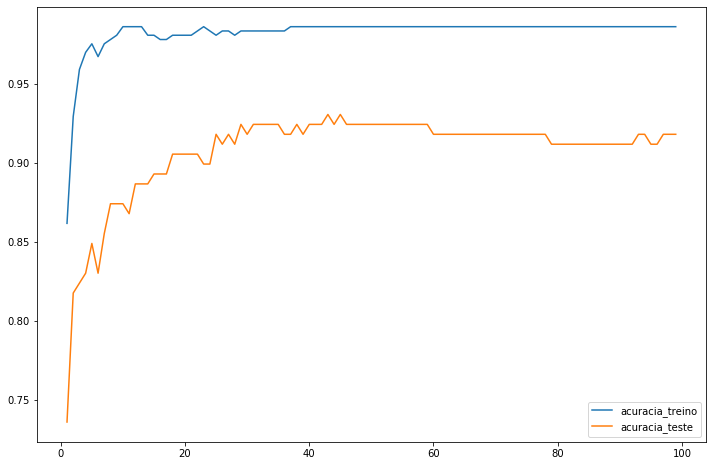

In [29]:
x_treino=df_treino[preditores].values
y_treino=df_treino[target].values
y_treino=y_treino.ravel()
x_teste=df_teste[preditores].values
y_teste=df_teste[target].values

valores=list(np.arange(1,100,1))

ac_treino=[]
ac_teste=[]
    
for val in valores:
    modelo=  RandomForestClassifier(n_estimators=val, max_depth=7, random_state=42)
    modelo.fit(x_treino, y_treino)
    #y_treino_pred=modelo.predict(x_treino)
    #y_teste_pred=modelo.predict(x_teste)
    ac_treino.append(modelo.score(x_treino, y_treino))
    ac_teste.append(modelo.score(x_teste, y_teste))
    
df_acuracia=pd.DataFrame({"Parametro":valores,"acuracia_treino":ac_treino,"acuracia_teste":ac_teste }, index=valores) 
df_acuracia[["acuracia_treino","acuracia_teste"]].plot()
df_acuracia.sort_values("acuracia_teste",inplace=True, ascending=False)
df_acuracia.head(40)

In [ ]:


modelo = RandomForestClassifier(n_estimators=27, random_state=42, max_depth=7)
result=classificação(modelo,target, preditores, df_treino, df_teste)
modelo=result["modelo"]
lista_modelos.append(result)


# Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
x_treino=df_treino[preditores].values
y_treino=df_treino[target].values
y_treino=y_treino.ravel()
x_teste=df_teste[preditores].values
y_teste=df_teste[target].values

valores=list(np.arange(0.01,1,0.01))

ac_treino=[]
ac_teste=[]
    
for val in valores:
    modelo=  GradientBoostingClassifier(random_state=42,max_depth=28,learning_rate=val)
    modelo.fit(x_treino, y_treino)
    #y_treino_pred=modelo.predict(x_treino)
    #y_teste_pred=modelo.predict(x_teste)
    ac_treino.append(modelo.score(x_treino, y_treino))
    ac_teste.append(modelo.score(x_teste, y_teste))
    
df_acuracia=pd.DataFrame({"Parametro":valores,"acuracia_treino":ac_treino,"acuracia_teste":ac_teste }, index=valores) 
df_acuracia[["acuracia_treino","acuracia_teste"]].plot()
df_acuracia.sort_values("acuracia_teste",inplace=True, ascending=False)
df_acuracia

In [ ]:

modelo = GradientBoostingClassifier(random_state=42,max_depth=28,learning_rate=0.48)
result=classificação(modelo,target, preditores, df_treino, df_teste)
modelo=result["modelo"]
lista_modelos.append(result)


# XGBoosting

In [ ]:
import xgboost as xgb

In [ ]:
x_treino=df_treino[preditores].values
y_treino=df_treino[target].values
y_treino=y_treino.ravel()
x_teste=df_teste[preditores].values
y_teste=df_teste[target].values

valores=list(np.arange(0.01,1,0.01))

ac_treino=[]
ac_teste=[]
    
for val in valores:
    modelo=   xgb.XGBClassifier(random_state=42,learning_rate=val,max_depth=28,gamma=0.5,verbosity=0)
    modelo.fit(x_treino, y_treino)
    #y_treino_pred=modelo.predict(x_treino)
    #y_teste_pred=modelo.predict(x_teste)
    ac_treino.append(modelo.score(x_treino, y_treino))
    ac_teste.append(modelo.score(x_teste, y_teste))
    
df_acuracia=pd.DataFrame({"Parametro":valores,"acuracia_treino":ac_treino,"acuracia_teste":ac_teste }, index=valores) 
df_acuracia[["acuracia_treino","acuracia_teste"]].plot()
df_acuracia.sort_values("acuracia_teste",inplace=True, ascending=False)
df_acuracia

In [ ]:
#XGBClassifier(max_depth=None, learning_rate=None, n_estimators=100, verbosity=None, objective=None, booster=None, tree_method=None, n_jobs=None, gamma=None, min_child_weight=None, max_delta_step=None, subsample=None, colsample_bytree=None, colsample_bylevel=None, colsample_bynode=None, reg_alpha=None, reg_lambda=None, scale_pos_weight=None, base_score=None, random_state=None, missing=nan, num_parallel_tree=None, monotone_constraints=None, interaction_constraints=None, importance_type='gain', gpu_id=None, validate_parameters=None, **kwargs)
import xgboost as xgb

modelo = xgb.XGBClassifier(random_state=42,
                           booster="gbtree",
                           learning_rate=0.5,
                           max_depth=28, 
                           gamma=0.5)
result=classificação(modelo,target, preditores, df_treino, df_teste)
modelo=result["modelo"]
lista_modelos.append(result)


# Comparando todos os modelos

In [ ]:
#lista_modelos
modelos=pd.DataFrame(lista_modelos)
modelos.sort_values("acuracia_teste", ascending=False, inplace=True)
modelos

In [ ]:
compara_modelos(lista_modelos, target, preditores, df_teste)

# Aplicando balanceamento

In [ ]:
preditores=list(df.columns)
target
preditores=list(set(preditores)-set(target))
preditores
target

In [ ]:
#from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_treino=df_treino[preditores].values
y_treino=(df_treino[target].values).ravel()
y_treino.shape
X_treino_bal, y_treino_bal = smote.fit_sample(X_treino, y_treino)
X_treino_bal.shape
y_treino_bal.shape
y_treino_bal=y_treino_bal.reshape((-1,1))
y_treino_bal.shape

variaveis=preditores+target

df_treino_bal=pd.DataFrame(X_treino_bal, columns=preditores)
df_treino_bal[target[0]]=y_treino_bal
df_treino_bal.sample(5)

In [ ]:
# balanceado
X_treino=df_treino_bal[preditores].values
y_treino=(df_treino_bal[target].values).ravel()
X_treino.shape
y_treino.shape
X_teste=df_teste[preditores].values
y_teste=np.array(df_teste[target]).ravel()
y_treino[1:10]

In [ ]:
rlog_bal = LogisticRegression(solver = 'sag', max_iter = 10000).fit(X_treino, y_treino)


In [ ]:
rlog_bal.intercept_
rlog_bal.coef_.round(3)

In [ ]:
y_proba= rlog_bal.predict_proba(X_treino).round(3)
y_proba[1:10]

In [ ]:
y_treino_pred=rlog_bal.predict(X_treino)
y_treino_pred[1:10]

In [ ]:
y_teste_rlog=rlog_bal.predict(X_teste)
y_teste_rlog[1:10]

In [ ]:
rlog_bal.score(X_treino, y_treino)

In [ ]:
rlog_bal.score(X_teste, y_teste)

## Matriz de confusão - scklearn

In [ ]:
#confusion_matrix(y, model.predict(x))
confusion_matrix(y_treino,y_treino_pred)


In [ ]:
plot_confusion_matrix(rlog_bal, X_treino, y_treino, cmap='Blues')

In [ ]:
plot_confusion_matrix(rlog_bal, X_teste, y_teste, cmap='Blues')

In [ ]:
#Do sckit 
#- Acurácia: % de predições corretas
#- Precisão: % de predições corretas dentro da classe positiva
#- Recall: % de predições corretas dentro da classe esperada como positiva
print(classification_report(y_treino, y_treino_pred, target_names=['No', 'Yes']))

In [ ]:
#Do sckit 
#- Acurácia: % de predições corretas
#- Precisão: % de predições corretas dentro da classe positiva
#- Recall: % de predições corretas dentro da classe esperada como positiva
print(classification_report(y_teste, y_teste_rlog, target_names=['No', 'Yes']))
print(f'Acurácia:{accuracy_score(y_teste, y_teste_rlog)}\n\
Precisão:{precision_score(y_teste, y_teste_rlog)}\n\
Recall:{recall_score(y_teste, y_teste_rlog)}')


## Curva ROC e AUC

In [ ]:
plot_roc_curve(rlog_bal, X_teste, y_teste)

## KNN

In [ ]:
knn_bal = KNeighborsClassifier(n_neighbors=1)
knn_bal.fit(X_treino, y_treino)
y_teste_knn = knn_bal.predict(X_teste)

### Matriz de confusão

In [ ]:
plot_confusion_matrix(knn_bal, X_teste, y_teste, cmap='Blues')

In [ ]:
print(f'Acurácia:{accuracy_score(y_teste, y_teste_knn)}\n\
Precisão:{precision_score(y_teste, y_teste_knn)}\n\
Recall:{recall_score(y_teste, y_teste_knn)}')

### Curva ROC

In [ ]:
plot_roc_curve(knn_bal, X_teste, y_teste)

# Comparando todos os modelos

In [ ]:
classifiers = [rlog_1, knn, rlog_bal, knn_bal]
ax = plt.gca()
for i in classifiers:
    plot_roc_curve(i, X_teste, y_teste, ax=ax)